# Assignment 3: Logistic Regression

<font color=darkblue>
    
In this assignment you will perform logistic regression to classify the financial condition of a new bank.

Enter the code along with your comments in each question section.

## Import Libraries & Data Overview

The file **Banks.csv** includes data on a sample of 20 banks. 

The “Financial Condition” column records the judgment of an expert on the financial condition of each bank. This response variable takes one of two possible values—weak or strong—according to the financial condition of the bank. 

The predictors are two ratios used in the financial analysis of banks: TotLns&Lses/Assets is the ratio of total loans and leases to total assets and TotExp/Assets is the ratio of total expenses to total assets. 

The target is to classify the financial condition of a new bank using the two ratios.


### Q1.1 Load Packages & Import Dataset

In [106]:
# Load the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.linear_model import LogisticRegression

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#for tuning the model
from sklearn.model_selection import GridSearchCV

In [107]:
# Import the dataset
df = pd.read_csv('Banks.csv')

In [108]:
# Preview
df.head()

,Obs,FinancialCondition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
0,1,1,9.7,0.12,0.65
1,2,1,1.0,0.11,0.62
2,3,1,6.9,0.09,1.02
3,4,1,5.8,0.10,0.67
4,5,1,4.3,0.11,0.69


In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Obs,20.0,10.5000,5.916080,1.00,5.750,10.50,15.2500,20.00
FinancialCondition,20.0,0.5000,0.512989,0.00,0.000,0.50,1.0000,1.00
TotCap/Assets,20.0,9.3200,4.797214,1.00,7.125,9.20,11.3000,20.50
TotExp/Assets,20.0,0.1045,0.026052,0.07,0.080,0.10,0.1200,0.16
TotLns&Lses/Assets,20.0,0.6285,0.159779,0.30,0.525,0.64,0.7225,1.02


**Ideally, Obs is is the row count. Should be exclude from the study.**

In [110]:
df = df.drop(columns = ['Obs'])

## Logistic Regression Model

### Q2.1 Modeling

Run a logistic regression model (on the entire dataset) that models the status of a bank as a function of the two financial measures, TotLns&Lses/Assets and TotExp/Assets. 

Specify the success class as weak (this is similar to creating a dummy that is 1 for financially weak banks and 0 otherwise), and use the default cutoff value of 0.5.


In [111]:
df['FinancialCondition'] = df.FinancialCondition.map({0:1, 1:0})

In [112]:
df.head()

,FinancialCondition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
0,0,9.7,0.12,0.65
1,0,1.0,0.11,0.62
2,0,6.9,0.09,1.02
3,0,5.8,0.10,0.67
4,0,4.3,0.11,0.69


**Separating the independent variables (X) and the dependent variable (Y)**

In [113]:
#Separating target variable and other variables
y= df.FinancialCondition
X= df.drop(columns = ['FinancialCondition','TotCap/Assets'])

In [114]:
X.head

<bound method NDFrame.head of     TotExp/Assets  TotLns&Lses/Assets
0            0.12                0.65
1            0.11                0.62
2            0.09                1.02
3            0.10                0.67
4            0.11                0.69
5            0.13                0.74
6            0.10                0.79
7            0.13                0.63
8            0.16                0.72
9            0.16                0.57
10           0.08                0.43
11           0.12                0.80
12           0.07                0.69
13           0.08                0.53
14           0.09                0.73
15           0.09                0.30
16           0.08                0.49
17           0.11                0.55
18           0.08                0.44
19           0.08                0.51>

**Scaling**

In [115]:
#Scaling the data
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

**Train Test split**

In [116]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

**Logistic Regression Model fit**

In [117]:
#fitting logistic regression model
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

### Q2.2 Estimated Equations

Write the estimated equation that associates the financial condition of a bank with its two predictors in three formats:

a. The logit as a function of the predictors

b. The odds as a function of the predictors

c. The probability as a function of the predictors


In [118]:
print(lg.coef_)
print(lg.intercept_)

[[-1.29972558 -0.38653676]]
[0.2335531]


The probability function is given by:

1 / (1 + np.exp(linear function(X)))

In this case: the probability function will be given as:

In [133]:
prob_class_1 = expit(X.iloc[:, 0] * lg.coef_[:,0] +
             X.iloc[:, 1] * lg.coef_[:,1]+ lg.intercept_)
print(prob_class_1)


0     0.456693
1     0.462801
2     0.431020
3     0.461228
4     0.456082
5     0.444863
6     0.449725
7     0.455387
8     0.437157
9     0.451471
10    0.490842
11    0.442347
12    0.469005
13    0.481187
14    0.458696
15    0.500154
16    0.485047
17    0.469535
18    0.489876
19    0.483117
dtype: float64
0     0.543307
1     0.537199
2     0.568980
3     0.538772
4     0.543918
5     0.555137
6     0.550275
7     0.544613
8     0.562843
9     0.548529
10    0.509158
11    0.557653
12    0.530995
13    0.518813
14    0.541304
15    0.499846
16    0.514953
17    0.530465
18    0.510124
19    0.516883
dtype: float64


In [134]:
prob_class_0 = 1 - (expit(X.iloc[:, 0] * lg.coef_[:,0] +
             X.iloc[:, 1] * lg.coef_[:,1]+ lg.intercept_))
print(prob_class_0)

0     0.543307
1     0.537199
2     0.568980
3     0.538772
4     0.543918
5     0.555137
6     0.550275
7     0.544613
8     0.562843
9     0.548529
10    0.509158
11    0.557653
12    0.530995
13    0.518813
14    0.541304
15    0.499846
16    0.514953
17    0.530465
18    0.510124
19    0.516883
dtype: float64


Logit as:

logit = ln(prob / 1 - prob)

In [141]:
# Logit for class 1
print(np.log(prob_class_1 / (1 - prob_class_1)))

0    -0.173663
1    -0.149070
2    -0.277690
3    -0.155399
4    -0.176127
5    -0.221448
6    -0.201783
7    -0.178929
8    -0.252709
9    -0.194729
10   -0.036636
11   -0.231643
12   -0.124138
13   -0.075289
14   -0.165594
15    0.000617
16   -0.059828
17   -0.122012
18   -0.040501
19   -0.067559
dtype: float64


In [139]:
# Logit for class 0
print(np.log(prob_class_0 / (1 - prob_class_0)))

0     0.173663
1     0.149070
2     0.277690
3     0.155399
4     0.176127
5     0.221448
6     0.201783
7     0.178929
8     0.252709
9     0.194729
10    0.036636
11    0.231643
12    0.124138
13    0.075289
14    0.165594
15   -0.000617
16    0.059828
17    0.122012
18    0.040501
19    0.067559
dtype: float64


In [140]:
# Or can be calculated by 
logit = lg.decision_function(X)
print(logit)

[-0.17366286 -0.14906951 -0.2776897  -0.15539909 -0.17612708 -0.22144843
 -0.2017835  -0.17892938 -0.25270946 -0.19472895 -0.03663575 -0.23164338
 -0.12413806 -0.07528943 -0.16559404  0.00061677 -0.05982796 -0.12201193
 -0.04050112 -0.06755869]


Odds can be found by:

odds = prob / 1- prob

In [143]:
# Odds for class one
print(prob_class_1 / (1 - prob_class_1))

0     0.840580
1     0.861509
2     0.757532
3     0.856073
4     0.838511
5     0.801357
6     0.817272
7     0.836165
8     0.776694
9     0.823058
10    0.964027
11    0.793229
12    0.883258
13    0.927475
14    0.847390
15    1.000617
16    0.941927
17    0.885138
18    0.960308
19    0.934673
dtype: float64


In [144]:
# Odds for class zero
print(prob_class_0 / (1 - prob_class_0))

0     1.189654
1     1.160754
2     1.320077
3     1.168124
4     1.192590
5     1.247883
6     1.223583
7     1.195936
8     1.287509
9     1.214982
10    1.037315
11    1.260670
12    1.132172
13    1.078196
14    1.180094
15    0.999383
16    1.061654
17    1.129768
18    1.041332
19    1.069893
dtype: float64


In [66]:
# Or can be calculated by
odds = np.exp(logit)
print(odds)

[0.84058024 0.86150923 0.75753185 0.85607346 0.83851142 0.80135725
 0.81727185 0.83616494 0.77669351 0.82305772 0.96402721 0.79322896
 0.88325789 0.92747501 0.84739017 1.00061696 0.94192657 0.88513781
 0.96030809 0.93467286]


Probability function is :

prob = sigmoid(C1X1 + C2X2 + intercept)

In [153]:
# same as to the code shown above
prob_class_1 = expit(X.iloc[:, 0] * lg.coef_[:,0] +
             X.iloc[:, 1] * lg.coef_[:,1]+ lg.intercept_)

for prob_0, prob_1 in zip(prob_class_0, prob_class_1):
    print(f"{prob_0} {prob_1}")

0.5433069302690021 0.4566930697309979
0.5371985172916034 0.4628014827083966
0.5689797314757062 0.43102026852429376
0.5387717786930564 0.4612282213069437
0.5439182967259815 0.45608170327401854
0.5551369672141337 0.4448630327858662
0.5502754033451696 0.4497245966548305
0.5446133821312692 0.4553866178687308
0.5628432785917232 0.4371567214082768
0.5485289844451389 0.45147101555486113
0.5091579143481441 0.49084208565185594
0.5576532748424188 0.4423467251575812
0.5309947210040062 0.4690052789959937
0.5188134713565851 0.481186528643415
0.5413041676005399 0.45869583239946016
0.4998458079906617 0.5001541920093383
0.5149525301598605 0.48504746984013947
0.5304651981180621 0.4695348018819378
0.510123896663218 0.489876103336782
0.5168832527219032 0.4831167472780968


In [145]:
# Or call to inbuild function
proba = lg.predict_proba(X)
print(proba)

[[0.54330693 0.45669307]
 [0.53719852 0.46280148]
 [0.56897973 0.43102027]
 [0.53877178 0.46122822]
 [0.5439183  0.4560817 ]
 [0.55513697 0.44486303]
 [0.5502754  0.4497246 ]
 [0.54461338 0.45538662]
 [0.56284328 0.43715672]
 [0.54852898 0.45147102]
 [0.50915791 0.49084209]
 [0.55765327 0.44234673]
 [0.53099472 0.46900528]
 [0.51881347 0.48118653]
 [0.54130417 0.45869583]
 [0.49984581 0.50015419]
 [0.51495253 0.48504747]
 [0.5304652  0.4695348 ]
 [0.5101239  0.4898761 ]
 [0.51688325 0.48311675]]


In [76]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       1.00      0.10      0.18        10

    accuracy                           0.55        20
   macro avg       0.76      0.55      0.44        20
weighted avg       0.76      0.55      0.44        20



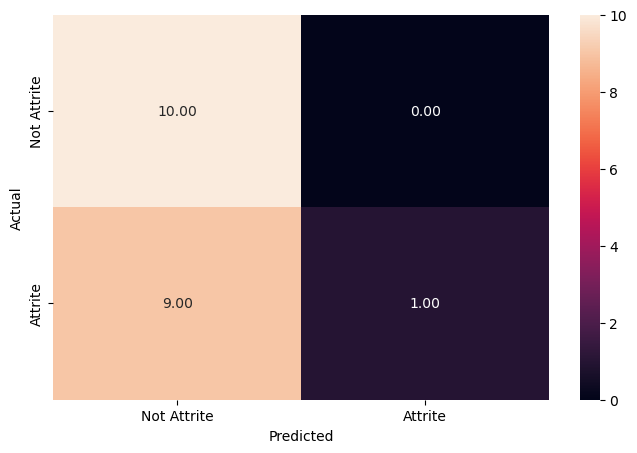

In [77]:
metrics_score(y, lg.predict(X))

## Classify Financial Condition of New Bank

### Q3.1 Estimates for New Bank

Consider a new bank whose total loans and leases/assets ratio = 0.6 and total expenses/assets ratio = 0.11. 

From your logistic regression model, estimate the following four quantities for this bank: 

the logit, the odds, the probability of being financially weak, and the classification of the bank (use cutoff = 0.5).

In [69]:
new_bank = lg.predict([[0.11,0.6]])

print(new_bank)

[0]


c:\Users\fengb\miniconda3\envs\py39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [160]:
nb_prob_class_1 = expit(0.11 * lg.coef_[:,0] +
             0.6 * lg.coef_[:,1]+ lg.intercept_)

nb_prob_class_0 = 1 - nb_prob_class_1

if nb_prob_class_1 >= 0.5:
    print('new bank is weak')
else:
    print('new bank is not weak')

new bank is not weak


**logit**

In [162]:
# Logit for class 1
print('logit class 1: ',np.log(nb_prob_class_1 / (1 - nb_prob_class_1)))

# Logit for class 0
print('logit class 0: ',np.log(nb_prob_class_0 / (1 - nb_prob_class_0)))

logit class 1:  [-0.14133877]
logit class 0:  [0.14133877]


In [70]:
lg.decision_function([[0.11,0.6]])

c:\Users\fengb\miniconda3\envs\py39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([-0.14133877])

**Odds**

In [163]:
# odds for class 1
print('odds class 1: ',nb_prob_class_1 / (1 - nb_prob_class_1))

# odds for class 0
print('odds class 0: ',nb_prob_class_0 / (1 - nb_prob_class_0))

odds class 1:  [0.86819514]
odds class 0:  [1.15181478]


In [71]:
np.exp(lg.decision_function([[0.11,0.6]]))

c:\Users\fengb\miniconda3\envs\py39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.86819514])

**Probability of being financially strong or weak**

In [164]:
nb_prob_class_1 = expit(0.11 * lg.coef_[:,0] +
             0.6 * lg.coef_[:,1]+ lg.intercept_)
print(nb_prob_class_1)

print(nb_prob_class_0)

[0.46472401]
[0.53527599]


In [72]:
lg.predict_proba([[0.11,0.6]])

c:\Users\fengb\miniconda3\envs\py39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.53527599, 0.46472401]])

The new bank is not weak

### Q3.2 Classify New Bank

We use a cutoff value of 0.5 to classify a record based on propensity. 

Instead, if we want to classify the record using the odds or logit, what value should we take as a cutoff?

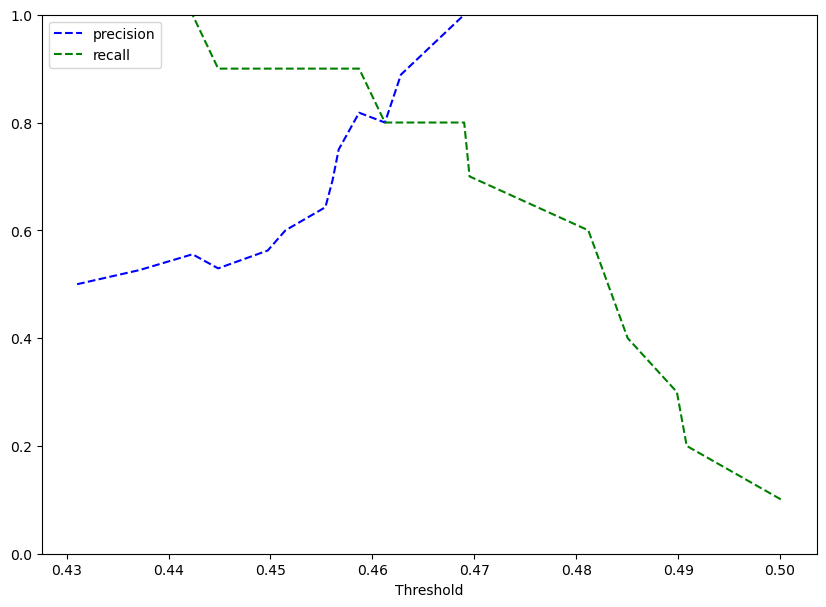

In [79]:
y_scores_lg=lg.predict_proba(X) #predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

Cutoff should be around **0.461**

In [80]:
optimal_threshold1=0.461

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.80      0.80      0.80        10

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



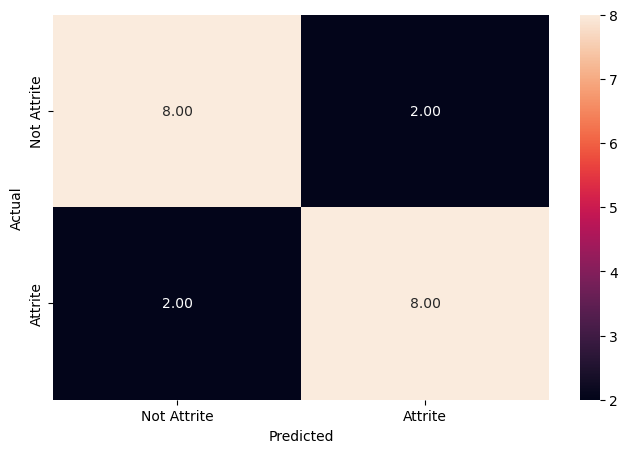

In [82]:
y_pred = lg.predict_proba(X)
metrics_score(y, y_pred[:,1]>optimal_threshold1)

A **balanced** cutoff is 0.461

### Q3.3 Cutoff Value

When a bank with in poor financial condition is misclassified as financially strong, the misclassification cost is much higher than a financially strong bank misclassified as weak. 

To minimize the expected cost of misclassification, should the cutoff value for classification (which is currently at 0.5) be increased or decreased?

The statement that "When a bank with in poor financial condition is misclassified as financially strong, the misclassification cost is much higher than a financially strong bank misclassified as weak." means that we care about recall more than precision.  We would like to decrease False Negative. By looking at the precision and recall plot.

We should
**decrease**
more even from 0.5.